In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## 📘 Table of Contents

1. **Data Collection and Inspection**
   - Load dataset
   - Check shape and structure
   - Understand data types
   - Initial statistical summary

2. **Handling Missing Values**
   - Identify missing data
   - Delete or impute missing values

3. **Fixing Inconsistency**
   - Format standardization
   - Correcting categorical inconsistencies
   - Removing unwanted spaces and symbols

4. **Handling Duplicates**
   - Detect duplicate records
   - Remove or resolve duplicates

5. **Correcting Data Types**
   - Convert to appropriate data types (numeric, datetime, categorical)

6. **Handling Outliers**
   - Identify outliers
   - Treat outliers (remove, cap, or transform)


In [5]:
df=pd.read_csv('/content/messy_customer_sales_data.csv')

#Data Exploration

In [6]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [7]:
df.head()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [11]:
# summary Statics
df.describe().round(2)

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.00,9177.00,1.020000e+04
mean,29090.13,5.48,4.979974e+09
std,208697.09,2.87,2.902593e+09
min,-500.00,1.00,9.208990e+05
25%,12295.00,3.00,2.449157e+09
50%,24330.00,5.00,4.988639e+09
75%,37130.00,8.00,7.510448e+09
max,9999999.00,10.00,9.994402e+09


In [17]:
missing_count = df.isnull().sum()
missing_count

,0
Customer_ID,1023
Name,0
Gender,1026
Age,951
City,1016
Signup_Date,0
Last_Purchase_Date,1012
Purchase_Amount,1021
Feedback_Score,1023
Email,0


In [18]:
missing_percent = df.isnull().sum()/len(df)*100
missing_percent

,0
Customer_ID,10.029412
Name,0.000000
Gender,10.058824
Age,9.323529
City,9.960784
Signup_Date,0.000000
Last_Purchase_Date,9.921569
Purchase_Amount,10.009804
Feedback_Score,10.029412
Email,0.000000


In [14]:
df.shape

(10200, 12)

In [20]:
# duplicate rows summary
df[df.duplicated()].shape

(15, 12)

In [22]:
#Duplicate Key check (Customer_ID)
df['Customer_ID'].value_counts()

,count
Customer_ID,
CUST10800,2
CUST6588,2
CUST9062,2
CUST1852,2
CUST5472,2
...,...
CUST1585,1
CUST3825,1
CUST2446,1


In [23]:
df[df['Customer_ID'] == 'CUST3374']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2914,CUST3374,Timothy Wallace,m,58.0,Bangalore,2024-03-08,2025-08-21,45779.0,1.0,glenn95@example.org,9687701793,India
3047,CUST3374,Timothy Wallace,m,58.0,bangalore,2024-03-08,2025-08-21,45779.0,1.0,glenn95@example.org,9687701793,India


In [24]:
#category count
for col in df.columns:
  if df[col].nunique() < 20:
    print(df[col].value_counts())
    print('_'*50)

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
__________________________________________________
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
__________________________________________________
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
__________________________________________________
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
__________________________________________________


#Handling Missing Values

In [30]:
df.shape

(9177, 12)

In [37]:
#make a copy of data
df_clean = df.copy()

In [38]:
df_clean.isnull().sum()

,0
Customer_ID,0
Name,0
Gender,934
Age,859
City,918
Signup_Date,0
Last_Purchase_Date,914
Purchase_Amount,927
Feedback_Score,905
Email,0


In [39]:
df_clean['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [40]:
def extract_age(age):
    age_num = re.findall('[0-9]+',str(age))
    if len(age_num) > 0:
        return age_num[0]
    else:
        return age

In [41]:
df_clean['Age'] = df_clean['Age'].apply(lambda x : extract_age(x))
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,NaN,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [42]:
age_df = df_clean[df_clean['Age']!='nan years'].dropna()['Age']
age_median = int(age_df.astype('int64').median())

In [43]:
# replace nan with median age and extracting numbers
df_clean['Age'].replace('nan years',age_median, inplace = True)

/tmp/ipython-input-536025140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].replace('nan years',age_median, inplace = True)


In [44]:
# Fill numerical columns with median
df_clean['Age'].fillna(age_median, inplace=True)
df_clean['Purchase_Amount'].fillna(df_clean['Purchase_Amount'].median(), inplace = True)

# Fill categorical columns with mode
cat_cols = ['Gender', 'City', 'Country','Feedback_Score']
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Forward Fill datetime column
df_clean['Last_Purchase_Date'].ffill(inplace = True)
df_clean

/tmp/ipython-input-1417319122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-1417319122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,Kolkata,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


#Handling Inconsistency

In [45]:
df_clean['Gender'].unique()

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female'],
      dtype=object)

In [48]:
df_clean['Gender'].str.lower().str.strip()

,Gender
0,m
1,m
2,f
3,female
4,f
...,...
10194,f
10195,female
10197,m
10198,female


In [49]:
df_clean['Gender'].replace({'m ':'Male', 'M':'Male','F':'Female','f ': 'Female'}, inplace = True)
df_clean['Gender'] = df_clean['Gender'].str.capitalize()


In [51]:
df_clean['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
df_clean['City'] = df_clean['City'].str.strip().str.capitalize()

In [53]:
df_clean['Country'].replace({'IND':'India'}, inplace = True)
df_clean['Country'] = df_clean['Country'].str.capitalize()

/tmp/ipython-input-1443119479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Country'].replace({'IND':'India'}, inplace = True)


In [54]:
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,Male,52,Kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,Male,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,India
2,CUST3754,Brittney Martinez,Female,62,Hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,Female,40,Hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,India
4,CUST5683,Matthew Carroll,Female,41,Chennai,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,Female,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,Female,35,Delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,India
10197,CUST6315,Joshua Martinez,Male,25,Hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,Female,55,Kolkata,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,India


#Handling Dupliates

In [55]:
df_clean[df_clean.duplicated()].shape

(163, 12)

In [56]:
df_clean = df_clean.drop_duplicates(keep='first')
df_clean.shape

(9014, 12)

In [57]:
df_clean[df_clean.duplicated()].shape

(0, 12)

In [58]:
df_clean['Customer_ID'].value_counts()

,count
Customer_ID,
CUST6069,2
CUST9950,2
CUST7652,2
CUST5341,2
CUST2510,2
...,...
CUST6618,1
CUST2244,1
CUST6807,1


In [59]:
df_clean[df_clean['Customer_ID'] == 'CUST9534']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3528,CUST9534,Melissa Jones,Male,53,Kolkata,2021-08-26,2025-08-11,21959.0,8.0,cassandrahill@example.net,7734467854,India
9005,CUST9534,Melissa Jones,Male,53,Kolkata,2021-08-26,2025-01-05,21959.0,8.0,cassandrahill@example.net,7734467854,India


In [60]:
# Check duplicates based on Customer_ID (primary key)
partial_duplicates = df_clean[df_clean.duplicated(subset=['Customer_ID'], keep=False)]
print(f"🔍 Partial Duplicates (Customer ID): {partial_duplicates.shape[0]}")

partial_duplicates.sort_values(by='Customer_ID').head(10)

🔍 Partial Duplicates (Customer ID): 28


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
8155,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-25,35963.0,2.0,houstonalexis@example.org,5052686676,India
2430,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-09,35963.0,2.0,houstonalexis@example.org,5052686676,India
9656,CUST10236,Brittney Boyd,Male,19,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
1914,CUST2510,Henry Taylor,Female,29,Bangalore,2021-06-09,2025-06-14,24268.0,2.0,woodwilliam@example.com,6090100995,India
2242,CUST2510,Henry Taylor,Female,29,Bangalore,2021-06-09,2024-10-23,24268.0,2.0,woodwilliam@example.com,6090100995,India
8273,CUST2905,Judith Miller,Female,44,Kolkata,2025-03-26,2024-11-15,43693.0,8.0,kmurphy@example.net,324890056,India
5498,CUST2905,Judith Miller,Female,44,Kolkata,2025-03-26,2025-06-30,43693.0,8.0,kmurphy@example.net,324890056,India
9183,CUST3484,Jose Hartman,Female,3,Kolkata,2025-07-06,2025-01-14,21446.0,2.0,coryadams@example.net,5973791231,India
8411,CUST3484,Jose Hartman,Female,56,Kolkata,2025-07-06,2025-01-14,21446.0,2.0,coryadams@example.net,5973791231,India


In [61]:
df_clean = df_clean.drop_duplicates(subset=['Customer_ID'], keep='first')
df_clean.shape

(9000, 12)

#Correcting Data Types

In [62]:
df_clean['Age'].astype('int64')

,Age
0,52
1,51
2,62
3,40
4,41
...,...
10193,26
10194,40
10195,35
10197,25


In [63]:
df_clean.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date',
       'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email',
       'Phone_Number', 'Country'],
      dtype='object')

In [64]:
df_clean['Signup_Date'] = pd.to_datetime(df_clean['Signup_Date'])
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,Male,52,Kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,Male,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,India
2,CUST3754,Brittney Martinez,Female,62,Hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,Female,40,Hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,India
4,CUST5683,Matthew Carroll,Female,41,Chennai,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10193,CUST6352,Isaiah Terry,Female,26,Kolkata,2023-03-04,2025-06-30,43655.0,6.0,lopezleonard@example.net,7694723210,India
10194,CUST6146,Cody Thompson,Female,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,Female,35,Delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,India
10197,CUST6315,Joshua Martinez,Male,25,Hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India


In [65]:
df_clean['Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'])
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,Male,52,Kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,Male,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,India
2,CUST3754,Brittney Martinez,Female,62,Hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,Female,40,Hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,India
4,CUST5683,Matthew Carroll,Female,41,Chennai,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10193,CUST6352,Isaiah Terry,Female,26,Kolkata,2023-03-04,2025-06-30,43655.0,6.0,lopezleonard@example.net,7694723210,India
10194,CUST6146,Cody Thompson,Female,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,Female,35,Delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,India
10197,CUST6315,Joshua Martinez,Male,25,Hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India


In [66]:
df_clean.dtypes

,0
Customer_ID,object
Name,object
Gender,object
Age,object
City,object
Signup_Date,datetime64[ns]
Last_Purchase_Date,datetime64[ns]
Purchase_Amount,float64
Feedback_Score,float64
Email,object


#Handling Outliers


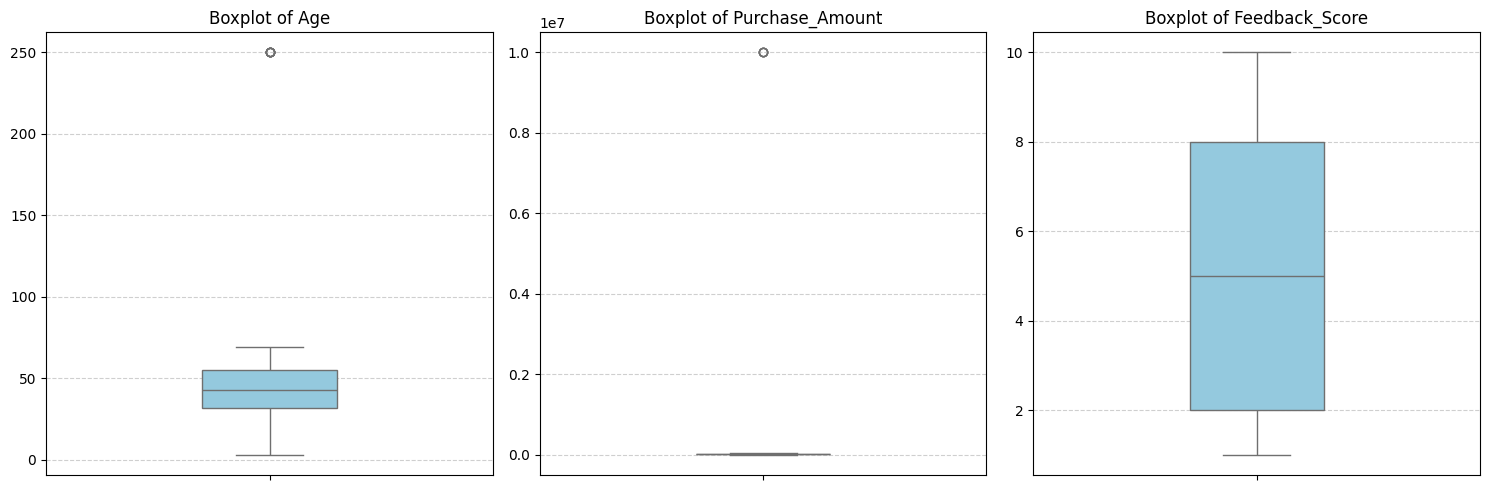

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Age' is numeric before plotting
df_clean['Age'] = df_clean['Age'].astype('int64')

cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [69]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_clean[['Age', 'Purchase_Amount', 'Feedback_Score']]))

# Identify outliers (any row with z > 3)
outlier_mask = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected (Z-score method): {outlier_mask.sum()}")

# Display sample outliers
df_clean[outlier_mask]

Number of outliers detected (Z-score method): 11


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,Female,250,Chennai,2022-05-21,2025-05-31,3554.0,2.0,hudsonsandra@example.net,5752427586,India
932,CUST1207,Cathy Robinson,Female,250,Delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,India
2383,CUST3987,Erica Johnson,Male,47,Kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,India
3368,CUST7314,Gavin Yates,Male,50,Bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,India
4674,CUST8481,Denise Combs,Female,62,Mumbai,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,India
4692,CUST10561,Richard Brown,Female,58,Mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,India
5279,CUST4536,Alexandra Ramos,Male,250,Chennai,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,India
5949,CUST7041,Joseph Young,Male,250,Delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,India
6085,CUST8110,Betty Cole,Female,250,Bangalore,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India


In [70]:
df_clean = df_clean[~outlier_mask]

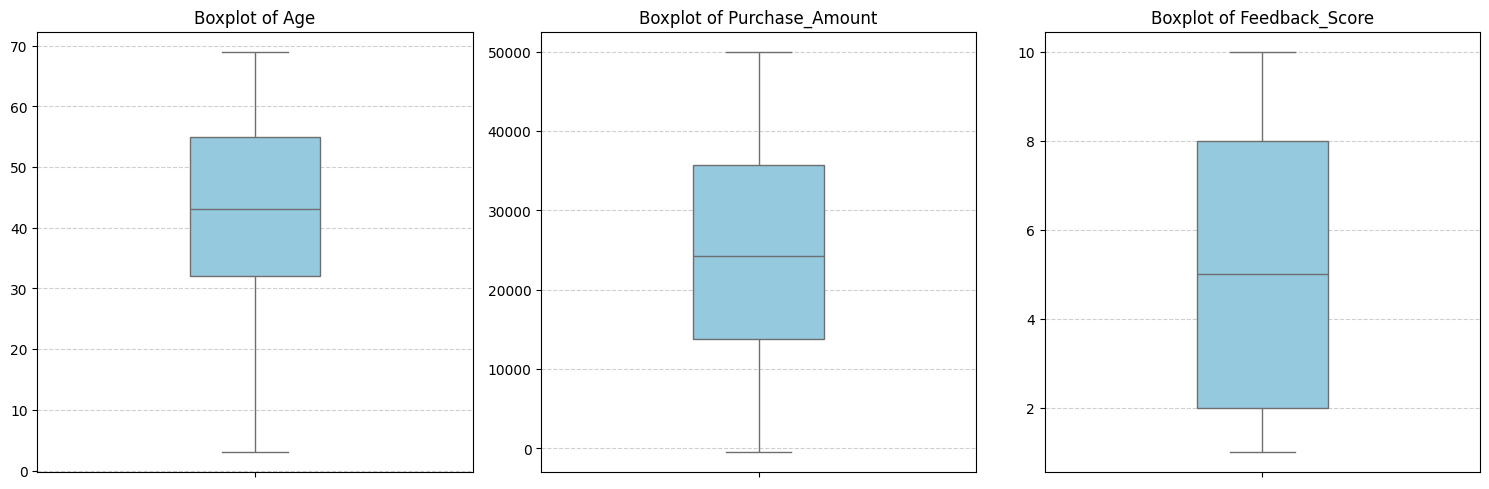

In [71]:
cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()